In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

Odczyt danych w których pozostawiliśmy tylko Warszawę i Lisbonę (edycja w Excel)

In [6]:
data_path_warsaw_lisbon = 'warsawlisbon.csv'
warsaw_lisbon_data = pd.read_csv(data_path_warsaw_lisbon)

warsaw_lisbon_data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Europe,Poland,NaN,Warsaw,1,1,1995,35.4
1,Europe,Poland,NaN,Warsaw,1,2,1995,30.5
2,Europe,Poland,NaN,Warsaw,1,3,1995,27.2
3,Europe,Poland,NaN,Warsaw,1,4,1995,22.9
4,Europe,Poland,NaN,Warsaw,1,5,1995,18.7


Na tym etapie stwierdzamy, że `Region`, `Country` i `State` nie są nam potrzebne

In [8]:
warsaw_lisbon_data = warsaw_lisbon_data.drop('Region', axis=1)
warsaw_lisbon_data = warsaw_lisbon_data.drop('Country', axis=1)
warsaw_lisbon_data = warsaw_lisbon_data.drop('State', axis=1)

warsaw_lisbon_data

,City,Month,Day,Year,AvgTemperature
0,Warsaw,1,1,1995,35.4
1,Warsaw,1,2,1995,30.5
2,Warsaw,1,3,1995,27.2
3,Warsaw,1,4,1995,22.9
4,Warsaw,1,5,1995,18.7
...,...,...,...,...,...
18527,Lisbon,5,9,2020,59.8
18528,Lisbon,5,10,2020,60.0
18529,Lisbon,5,11,2020,60.3
18530,Lisbon,5,12,2020,59.6


`Month`, `Day`, `Year` i `AvgTemperature` to liczby

In [15]:
warsaw_lisbon_data["Month"] = pd.to_numeric(warsaw_lisbon_data["Month"])
warsaw_lisbon_data["Day"] = pd.to_numeric(warsaw_lisbon_data["Day"])
warsaw_lisbon_data["Year"] = pd.to_numeric(warsaw_lisbon_data["Year"])
warsaw_lisbon_data["AvgTemperature"] = pd.to_numeric(warsaw_lisbon_data["AvgTemperature"])

Dzielimy dane na miasta i sortujemy datą

In [18]:
warsaw_data = warsaw_lisbon_data.copy()[warsaw_lisbon_data.City == 'Warsaw']
lisbon_data = warsaw_lisbon_data.copy()[warsaw_lisbon_data.City == 'Lisbon']

warsaw_data['Date'] = pd.to_datetime(warsaw_data[['Year', 'Month', 'Day']])
lisbon_data['Date'] = pd.to_datetime(lisbon_data[['Year', 'Month', 'Day']])

warsaw_data = warsaw_data.sort_values(by='Date')
lisbon_data = lisbon_data.sort_values(by='Date')

Zobaczmy jak dane się prezentują na wykresie

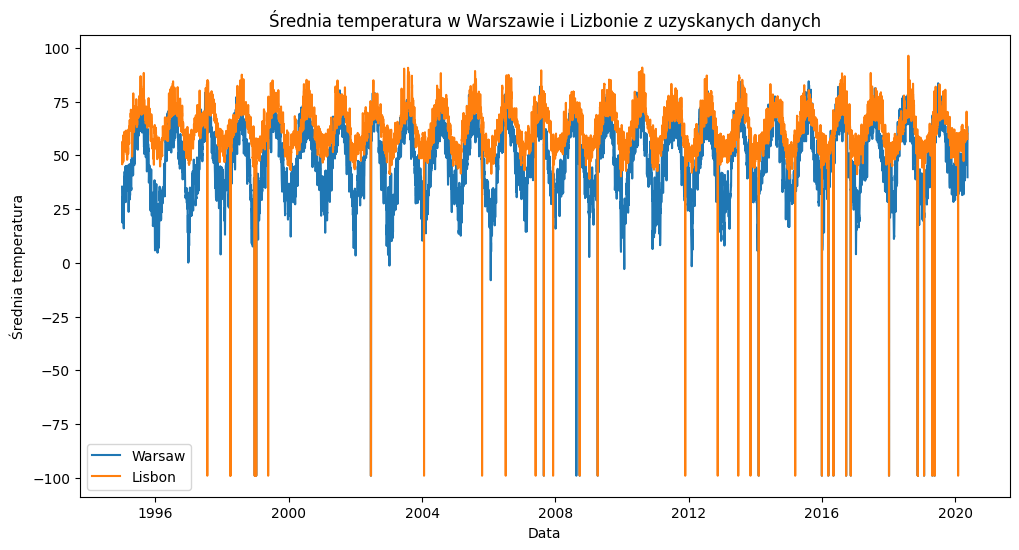

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(warsaw_data['Date'], warsaw_data['AvgTemperature'], label='Warsaw')
plt.plot(lisbon_data['Date'], lisbon_data['AvgTemperature'], label='Lisbon')

plt.title('Średnia temperatura w Warszawie i Lizbonie z uzyskanych danych')

plt.xlabel('Data')
plt.ylabel('Średnia temperatura')

plt.legend()
plt.show()

Widzimy teraz pewne problemy. W uzyskanych danych badacze nie zmierzeli danych dla wybranych konkretnych przypadkowych dni co powoduje problem.

Dodatkowo temperatura jest prawdopodobnie w Farenheitach 

In [25]:
lisbon_data[lisbon_data.AvgTemperature < -75].head()

,City,Month,Day,Year,AvgTemperature,Date
10200,Lisbon,7,23,1997,-99.0,1997-07-23
10450,Lisbon,3,30,1998,-99.0,1998-03-30
10455,Lisbon,4,4,1998,-99.0,1998-04-04
10456,Lisbon,4,5,1998,-99.0,1998-04-05
10719,Lisbon,12,24,1998,-99.0,1998-12-24


Potwierdza się hipoteza, `-99` to wartość kiedy prawdopodobnie temp. nie została zmierzona bo mija się to z prawdą. Zmienimy je na średnią z 5 sasiądujących dni.
`brakujący dzień = 1/4 (-2 dzień + -1 dzień + +1 dzień + +2dzień)`

In [42]:
# tu kod do obsługi

lisbon_data[lisbon_data.AvgTemperature < -75].head()

DataError: No numeric types to aggregate

In [25]:
print(warsaw_lisbon_data.head())
print(warsaw_lisbon_data['AvgTemperature'].describe())


   Region Country  State    City  Month  Day  Year  AvgTemperature
0  Europe  Poland    NaN  Warsaw      1    1  1995      -39.988824
1  Europe  Poland    NaN  Warsaw      1    2  1995      -39.989550
2  Europe  Poland    NaN  Warsaw      1    3  1995      -39.990039
3  Europe  Poland    NaN  Warsaw      1    4  1995      -39.990677
4  Europe  Poland    NaN  Warsaw      1    5  1995      -39.991299
count    18532.000000
mean       -39.985946
std          0.002599
min        -40.008745
25%        -39.987075
50%        -39.985548
75%        -39.984229
max        -39.979797
Name: AvgTemperature, dtype: float64


In [54]:
print("Przed konwersją:", warsaw_lisbon_data['AvgTemperature'].head())
warsaw_lisbon_data['AvgTemperature'] = (warsaw_lisbon_data['AvgTemperature'] - 32) * 5/9
print("Po konwersji:", warsaw_lisbon_data['AvgTemperature'].head())


Przed konwersją: 0   -40.0
1   -40.0
2   -40.0
3   -40.0
4   -40.0
Name: AvgTemperature, dtype: float64
Po konwersji: 0   -40.0
1   -40.0
2   -40.0
3   -40.0
4   -40.0
Name: AvgTemperature, dtype: float64


In [35]:
warsaw_lisbon_data['Date'] = pd.to_datetime(warsaw_lisbon_data[['Year', 'Month', 'Day']])
print(warsaw_lisbon_data[['Year', 'Month', 'Day', 'Date']].head())  


   Year  Month  Day       Date
0  2019      1    1 2019-01-01
1  2019      1    2 2019-01-02
2  2019      1    3 2019-01-03
3  2019      1    4 2019-01-04
4  2019      1    5 2019-01-05


In [36]:
warsaw_data = warsaw_lisbon_data[warsaw_lisbon_data['City'] == 'Warsaw']
lisbon_data = warsaw_lisbon_data[warsaw_lisbon_data['City'] == 'Lisbon']
warsaw_data.set_index('Date', inplace=True)
lisbon_data.set_index('Date', inplace=True)

warsaw_weekly_avg = warsaw_data['AvgTemperature'].resample('W').mean()
lisbon_weekly_avg = lisbon_data['AvgTemperature'].resample('W').mean()

print("Warsaw weekly avg:", warsaw_weekly_avg.head())
print("Lisbon weekly avg:", lisbon_weekly_avg.head())


Warsaw weekly avg: Date
2019-01-06    31.116667
2019-01-13    26.342857
2019-01-20    32.828571
2019-01-27     6.714286
2019-02-03    34.685714
Freq: W-SUN, Name: AvgTemperature, dtype: float64
Lisbon weekly avg: Date
2019-01-06    48.083333
2019-01-13    48.800000
2019-01-20    50.728571
2019-01-27    31.828571
2019-02-03    52.714286
Freq: W-SUN, Name: AvgTemperature, dtype: float64


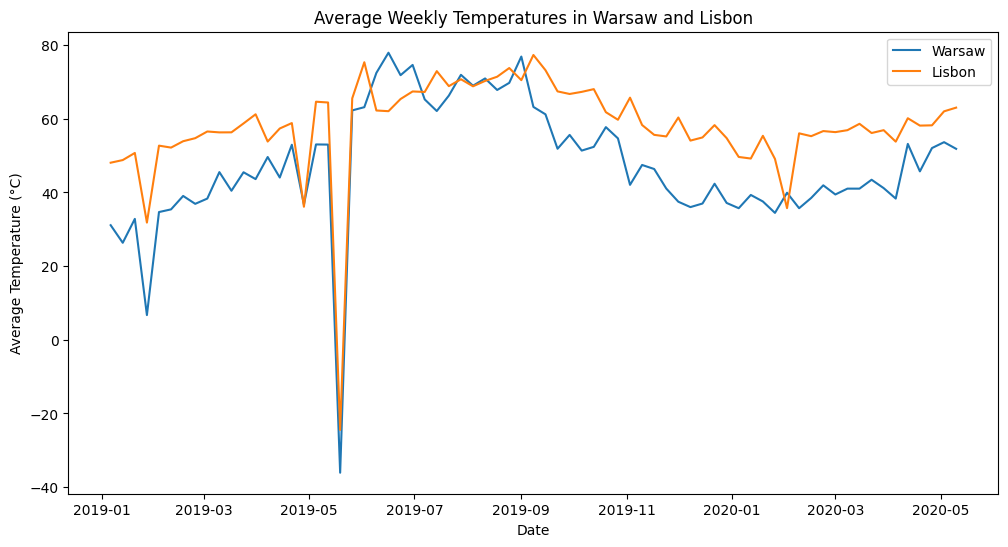

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(warsaw_weekly_avg.index, warsaw_weekly_avg, label='Warsaw')
plt.plot(lisbon_weekly_avg.index, lisbon_weekly_avg, label='Lisbon')
plt.title('Average Weekly Temperatures in Warsaw and Lisbon')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()
